You need to download lastest.pth under folder

preprocessing

https://drive.google.com/file/d/1UOfdd6X83Jl9Sex-7fA9gmzCjqDqJUFz/view?usp=sharing

then run the code below.

In [1]:
import os
os.chdir(r"./mmsegmentation")

In [2]:
from matplotlib import pyplot as plt
from mmseg.apis import inference_segmentor, init_segmentor
import mmcv
import numpy as np
import cv2
from PIL import Image,ImageChops
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#### You can change the path here and select any other image that's in the data folder or any other image that you specify.

In [3]:
img_path = r".\data\IMG_3177.jpg"

In [4]:
def seg(img_path):
    config_file = r'.\my_deeplabv3plus_r50-d8_480x480_40k_pascal_context.py'
    checkpoint_file = r'..\latest.pth'
    model = init_segmentor(config_file, checkpoint_file, device='cuda:0')
    result = inference_segmentor(model, img_path)
    seg = result[0]
    img = mmcv.imread(img_path)
    img1 = img.copy()
    img1[seg == 0, :] = [0,0,0]
    img1 = img1.astype(np.uint8)
    img1 = Image.fromarray(np.uint8(img1))
    img1 = cv2.cvtColor(np.array(img1), cv2.COLOR_RGB2BGR)
    return img1
def rotate_and_fill(image, angle, fill_color):
    radian = np.deg2rad(angle)
    width, height = image.size
    cos_val = abs(np.cos(radian))
    sin_val = abs(np.sin(radian))
    new_width = int(width * cos_val + height * sin_val)
    new_height = int(width * sin_val + height * cos_val)
    
    # if isinstance(fill_color, tuple):
    #     fill_color = tuple(np.array(fill_color, dtype=np.uint8))
    # else:
    #     fill_color = tuple(np.array([fill_color]*3, dtype=np.uint8))
    

    rotated_image = Image.new(image.mode, (new_width, new_height), fill_color)
    x = int((new_width - width) / 2)
    y = int((new_height - height) / 2)
    rotated_image.paste(image, (x, y))
    rotated_image = rotated_image.rotate(angle, expand=False)
    
    return rotated_image
def array_to_image(array):
    return Image.fromarray(np.uint8(array))
def image_to_array(image):
    return np.array(image)
def process_image(img):
    bg = Image.new(img.mode, img.size, img.getpixel((0,0)))
    diff = ImageChops.difference(img, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()

    img = img.crop(bbox)
    # img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    # mask = ((img[:,:,0] > 150) & (img[:,:,1] <200) & (img[:,:,2] > 150)) | ((img[:,:,0] < 120) & (img[:,:,1] < 20) & (img[:,:,2] < 40))
    # img[mask] = [0, 0, 0]
    # img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    width, height = img.size
    if width > height:
        img = img.transpose(Image.ROTATE_90)
    width, height = img.size
    if width>height/2:
        img = rotate_and_fill(img, angle=45, fill_color=(0,0,0))
        bg = Image.new(img.mode, img.size, img.getpixel((0,0)))
        diff = ImageChops.difference(img, bg)
        diff = ImageChops.add(diff, diff, 2.0, -100)
        bbox = diff.getbbox()
        img = img.crop(bbox)
        width, height = img.size
        if width > height:
            img = img.transpose(Image.ROTATE_90)
    return img
img = mmcv.imread(img_path)
img1 = seg(img_path)
img1 = array_to_image(img1)
img1 = process_image(img1)
img1 = image_to_array(img1)
img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

load checkpoint from local path: ..\latest.pth


#### Comparison before and after preprocessing

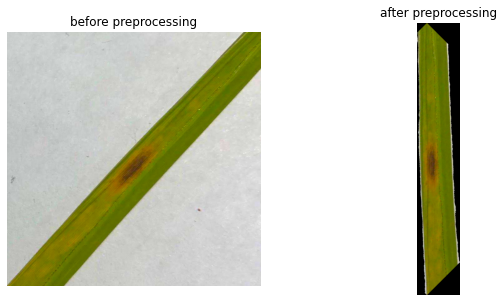

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].axis('off')
axs[1].imshow(img1)
axs[1].axis('off')
axs[0].set_title("before preprocessing")
axs[1].set_title("after preprocessing")
plt.show()